In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools

## expand_grid comes from
##     https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#creating-example-data
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

spotify_population = pd.read_feather("./data/spotify_2000_2020.feather")
attrition_pop = pd.read_feather("./data/attrition.feather")

spotify_sample = spotify_population[["artists", "name", "danceability"]].reindex()

In [7]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
print(spotify_1_resample)

                                               artists  \
32021                              ['Down A.K.A Kilo']   
37823                                      ['Beyoncé']   
8454                                         ['Tamia']   
10356                        ['Tyga', 'YG', 'Santana']   
34167                                      ['TobyMac']   
...                                                ...   
35286                                     ['Rod Wave']   
13005  ['Joachim Garraud', 'JD Davis', 'David Guetta']   
16578                                        ['Drake']   
20287                               ['Ross Copperman']   
2876                              ['Slightly Stoopid']   

                           name  danceability  
32021         Lean Like A Cholo         0.877  
37823                Speechless         0.568  
8454   Love Me in a Special Way         0.519  
10356                  MAMACITA         0.786  
34167              Made To Love         0.571  
...            

In [8]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5907652679085845


In [12]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000[:10])

[0.5918860668331093, 0.5923211182062609, 0.5912029839638947, 0.5922668595160361, 0.5899149702323795, 0.5932064528519301, 0.5903022133666218, 0.5906721360668331, 0.5924964494910697, 0.5901593359900135]


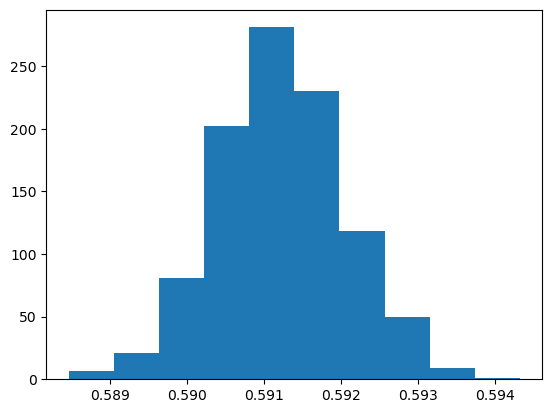

In [13]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

In [14]:
spotify_sample = spotify_population.sample(500)

In [16]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_population.sample(500)["popularity"].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp[:10])

[55.46, 55.362, 54.364, 54.984, 54.266, 54.664, 54.454, 55.282, 54.95, 54.972]


In [17]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample.sample(500, replace=True)["popularity"].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot[:10])

[54.678, 55.632, 54.982, 56.154, 55.204, 55.118, 55.504, 55.376, 55.026, 55.372]


In [18]:
sampling_distribution = mean_popularity_2000_samp
bootstrap_distribution = mean_popularity_2000_boot

In [19]:
# Calculate the population mean popularity
pop_mean = spotify_population["popularity"].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample["popularity"].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 55.212, 54.824629, 55.197682]


In [20]:
spotify_sample = spotify_population.sample(5000)

mean_popularity_2000_samp = []
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_population.sample(5000)["popularity"].mean()
    )

mean_popularity_2000_boot = []
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample.sample(5000, replace=True)["popularity"].mean()
    )

sampling_distribution = mean_popularity_2000_samp
bootstrap_distribution = mean_popularity_2000_boot

In [21]:
# Calculate the population std dev popularity
pop_sd = spotify_population["popularity"].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample["popularity"].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257204, 10.987504040909847, 10.041068964533869, 10.988550608721798]


In [26]:
from scipy.stats import norm

In [27]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(54.452995, 55.06482)


In [28]:
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(54.46162791374625, 55.070790886253754)
